In [13]:
import os
import pandas as pd 
from scipy.io import loadmat


def mat_data_generator(file_path, batch_size):

    #load the .mat file 
    #we don't load the entire data into memory, we use a generator to load the data in batches
    mat = loadmat(file_path, squeeze_me=True, struct_as_record=False)

    #the .mat file has 9 variables of interest
    variables = ['id', 'id_ref', 'IntErr_Id', 'IntErr_Iq', 'iq', 'iq_ref', 'Time', 'v_md', 'v_mq']
    data_length = len(mat['id']) #assuming all variables have the same length

    #calculate the number of batches
    Total_batches = data_length // batch_size

    for i in range(Total_batches + 1): # +1 to account for a potential partial batch
        start_idx = i * batch_size
        end_idx = start_idx + batch_size

        chunk_data = {}
        for var in variables:
            chunk_data[var] = mat[var][start_idx:end_idx]

        yield chunk_data

#test the generator
gen = mat_data_generator('C:/Users/valex/Desktop/Final_Project/Data/batch_1_sim_1_2023_10_13_17_8_53.mat', 1000) #batch size = 1000
all_df = []

for chunk in gen:
    #Process each chunk using pandas
    df = pd.DataFrame(chunk)

    #append the processed chunk to a list of dataframes
    #considering the size of the data
    all_df.append(df)

final_df = pd.concat(all_df, ignore_index=True)


In [14]:
id_df = final_df['id']
print(id_df.head()) #display the first 5 rows of the id column

id_df.info() #display the info of the id column

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: id, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 4005820 entries, 0 to 4005819
Series name: id
Non-Null Count    Dtype  
--------------    -----  
4005820 non-null  float64
dtypes: float64(1)
memory usage: 30.6 MB


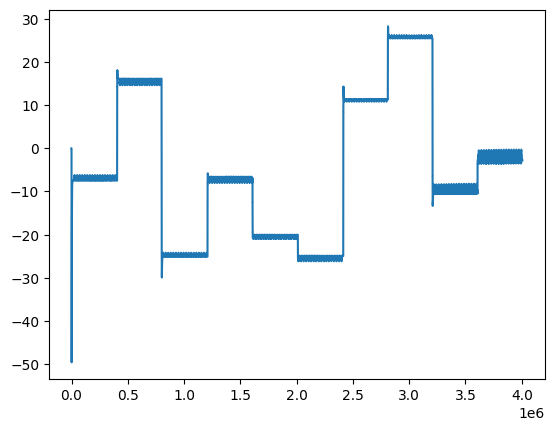

In [15]:
import matplotlib.pyplot as plt

plt.plot(id_df)
plt.show()